In [1]:
import tensorflow as tf   
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

C:\Users\q\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

# flatten the label values
train_labels, test_labels = train_labels.flatten(), test_labels.flatten()

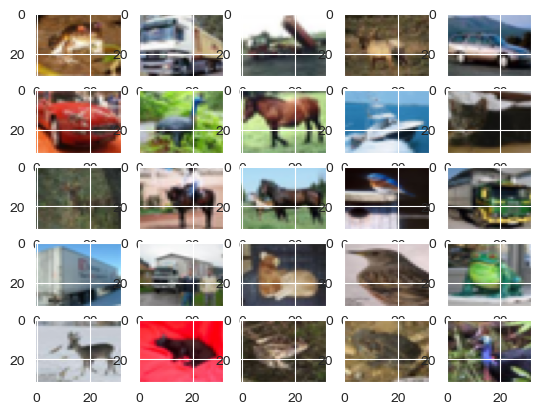

In [4]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(train_images[k], aspect='auto')
        k += 1
 
plt.show()

In [5]:
# number of classes
K = len(set(train_labels))
print("number of classes:", K)

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

number of classes: 10


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
r = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=50)

Epoch 1/50


1563/1563 [==============================] - 285s 181ms/step - loss: 1.2864 - accuracy: 0.5525 - val_loss: 1.2173 - val_accuracy: 0.5779
Epoch 2/50
1563/1563 [==============================] - 281s 180ms/step - loss: 0.8696 - accuracy: 0.6989 - val_loss: 0.8864 - val_accuracy: 0.6981
Epoch 3/50
1563/1563 [==============================] - 266s 170ms/step - loss: 0.7197 - accuracy: 0.7536 - val_loss: 0.7728 - val_accuracy: 0.7320
Epoch 4/50
1563/1563 [==============================] - 263s 168ms/step - loss: 0.6041 - accuracy: 0.7913 - val_loss: 0.8631 - val_accuracy: 0.7196
Epoch 5/50
1563/1563 [==============================] - 323s 207ms/step - loss: 0.5157 - accuracy: 0.8234 - val_loss: 0.7545 - val_accuracy: 0.7541
Epoch 6/50
1563/1563 [==============================] - 306s 196ms/step - loss: 0.4364 - accuracy: 0.8487 - val_loss: 0.7292 - val_accuracy: 0.7650
Epoch 7/50
1563/1563 [==============================] - 272s 174ms/step - loss: 0.3572 - accuracy: 0.8748 - va

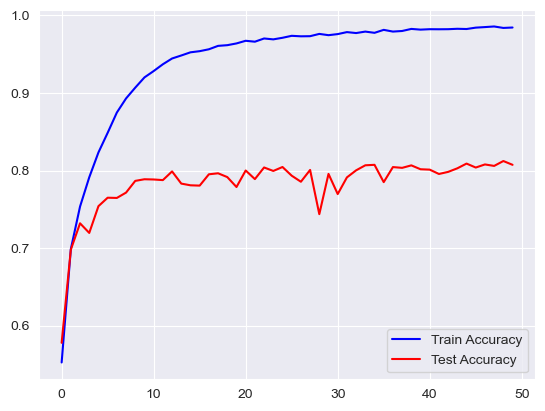

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(r.history['val_accuracy'], label='Test Accuracy', color='red')
plt.legend()

In [ ]:
# Fit with data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(train_images, train_labels, batch_size)
steps_per_epoch = train_images.shape[0] // batch_size
 
p = model.fit(train_generator, validation_data=(test_images, test_labels),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 279s 177ms/step - loss: 0.7567 - accuracy: 0.7652 - val_loss: 0.7426 - val_accuracy: 0.7818
Epoch 2/50
1562/1562 [==============================] - 273s 175ms/step - loss: 0.6204 - accuracy: 0.7997 - val_loss: 0.6398 - val_accuracy: 0.8000
Epoch 3/50
1562/1562 [==============================] - 403s 258ms/step - loss: 0.5588 - accuracy: 0.8148 - val_loss: 0.5616 - val_accuracy: 0.8201
Epoch 4/50
1562/1562 [==============================] - 392s 251ms/step - loss: 0.5298 - accuracy: 0.8262 - val_loss: 0.5299 - val_accuracy: 0.8303
Epoch 5/50
1562/1562 [==============================] - 394s 252ms/step - loss: 0.4914 - accuracy: 0.8373 - val_loss: 0.5181 - val_accuracy: 0.8341
Epoch 6/50
1562/1562 [==============================] - 371s 237ms/step - loss: 0.4779 - accuracy: 0.8417 - val_loss: 0.5744 - val_accuracy: 0.8226
Epoch 7/50
1562/1562 [==============================] - 368s 235ms/step - loss: 0.4550 - accuracy: 0.8480 - val_

In [ ]:
# Plot accuracy per iteration
plt.plot(p.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(p.history['val_accuracy'], label='Test Accuracy', color='red')
plt.legend()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

In [ ]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
map_preds = {0 : 'airplane',
                 1 : 'automobile',
                 2 : 'bird',
                 3 : 'cat',
                 4 : 'deer',
                 5 : 'dog',
                 6 : 'frog',
                 7 : 'horse',
                 8 : 'ship',
                 9 : 'truck'
                }
class_names = [map_preds[i] for i in range(10)]
class_report = classification_report(test_labels, predicted_labels, target_names=class_names)
print(f'Classification Report:\n{class_report}')

In [ ]:
conf_mat = confusion_matrix(
    y_true=test_labels,
    y_pred=predicted_labels
)

plt.figure(figsize=(8, 8))
sns.heatmap(
    conf_mat,
    cmap='Oranges',
    annot=True,
    cbar=False,
    fmt='.3g',
    xticklabels=[map_preds[i] for i in range(10)],
    yticklabels=[map_preds[i] for i in range(10)]
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.show()

In [ ]:
image_number = random.randint(0, len(test_images) - 1)
plt.imshow(test_images[image_number])

n = np.array(test_images[image_number])
p = n.reshape(1, 32, 32, 3)
predictions = model.predict(p)

predicted_class_index = np.argmax(predictions)

predicted_label = map_preds[predicted_class_index]

original_label = map_preds[test_labels[image_number]]

print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))